## Escuela Politécnica Nacional
## Métodos Numéricos
## Integrantes: 
### - Jhonn Saeteros
### - Christian Ayala

# Grafique la trayectoria de los siguientes sistemas de ecuaciones

# 1) $x_1+x_2=7$
# 2) $-2x_1+5x_2=0$
# 3) $x_0=(0,0)$
# 4) $x_0=(5,2)$
# 5) $x_1+x_2=6$
# 6) $-2x_1+x_2=0$

In [61]:
from iterative_methods import gauss_jacobi, gauss_seidel
import numpy as np
import matplotlib.pyplot as plt

# Sistema
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)

# Condiciones iniciales
x0_list = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]]),
    np.array([[100.0], [-100.0]])  # Candidata a divergencia
]


# Parámetros
tol = 1e-5
max_iter = 25


In [62]:
def resolver_y_graficar(x0, nombre):
    print(f"\nEvaluando desde {x0.ravel()}")

    # Gauss-Jacobi
    sol_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_jacobi = len(tray_jacobi) < max_iter

    # Gauss-Seidel
    sol_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_seidel = len(tray_seidel) < max_iter

    # Convertir trayectorias
    tray_jacobi = np.concatenate(tray_jacobi, axis=1).T
    tray_seidel = np.concatenate(tray_seidel, axis=1).T

    # Graficar trayectorias
    plt.figure(figsize=(8,6))
    plt.plot(tray_jacobi[:, 0], tray_jacobi[:, 1], 'o-', label='Gauss-Jacobi')
    plt.plot(tray_seidel[:, 0], tray_seidel[:, 1], 's--', label='Gauss-Seidel')
    plt.title(f"Trayectoria desde x₀ = {x0.ravel()} - {nombre}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Imprimir resultados
    print(f"Gauss-Jacobi: {'Convergió' if convergio_jacobi else 'Divergió'} → {sol_jacobi.ravel()}")
    print(f"Gauss-Seidel: {'Convergió' if convergio_seidel else 'Divergió'} → {sol_seidel.ravel()}")




Prueba: Prueba #1 con x0 = [0. 0.]
[07-15 17:41:07][INFO] i= 0 x: [[0. 0.]]
[07-15 17:41:07][INFO] i= 1 x: [[7. 0.]]
[07-15 17:41:07][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:41:07][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:41:07][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:41:07][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:41:07][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:41:07][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:41:07][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:41:07][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:41:07][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:41:07][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:41:07][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:41:07][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:41:07][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:41:07][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:41:07][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:41:07][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:41:07][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:41:07]

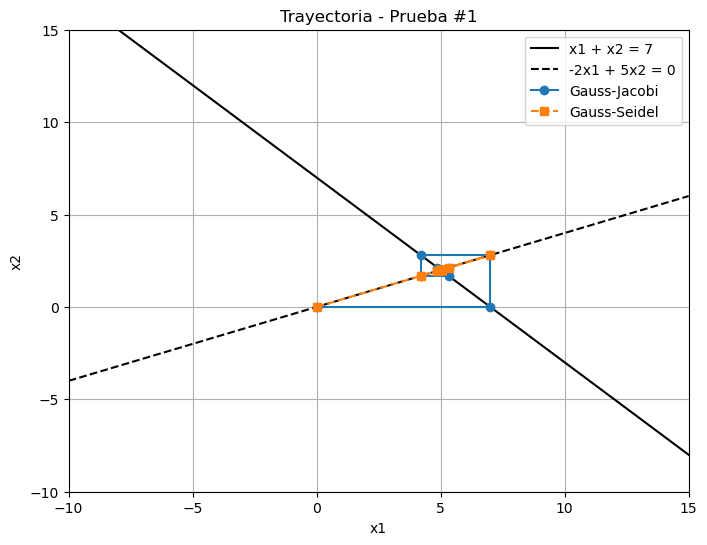

Gauss-Jacobi: Divergió → [5.00000537 1.99999463]
Gauss-Seidel: Convergió → [4.99999785 1.99999914]

Prueba: Prueba #2 con x0 = [5. 2.]
[07-15 17:41:08][INFO] i= 0 x: [[5. 2.]]
[07-15 17:41:08][INFO] i= 0 x: [[5. 2.]]


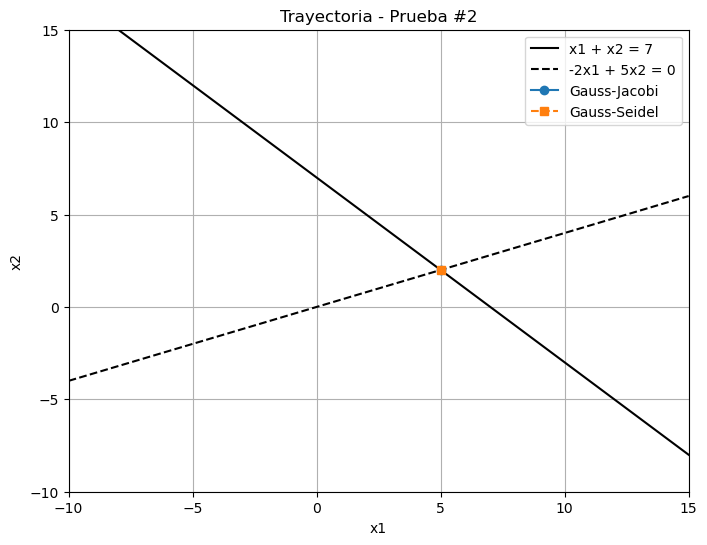

Gauss-Jacobi: Convergió → [5. 2.]
Gauss-Seidel: Convergió → [5. 2.]

Prueba: Prueba #3 con x0 = [ 100. -100.]
[07-15 17:41:08][INFO] i= 0 x: [[ 100. -100.]]
[07-15 17:41:08][INFO] i= 1 x: [[107.  40.]]
[07-15 17:41:08][INFO] i= 2 x: [[-33.   42.8]]
[07-15 17:41:08][INFO] i= 3 x: [[-35.8 -13.2]]
[07-15 17:41:08][INFO] i= 4 x: [[ 20.2  -14.32]]
[07-15 17:41:08][INFO] i= 5 x: [[21.32  8.08]]
[07-15 17:41:08][INFO] i= 6 x: [[-1.08   8.528]]
[07-15 17:41:08][INFO] i= 7 x: [[-1.528 -0.432]]
[07-15 17:41:08][INFO] i= 8 x: [[ 7.432  -0.6112]]
[07-15 17:41:08][INFO] i= 9 x: [[7.6112 2.9728]]
[07-15 17:41:08][INFO] i= 10 x: [[4.0272  3.04448]]
[07-15 17:41:08][INFO] i= 11 x: [[3.95552 1.61088]]
[07-15 17:41:08][INFO] i= 12 x: [[5.38912  1.582208]]
[07-15 17:41:08][INFO] i= 13 x: [[5.417792 2.155648]]
[07-15 17:41:08][INFO] i= 14 x: [[4.844352  2.1671168]]
[07-15 17:41:08][INFO] i= 15 x: [[4.8328832 1.9377408]]
[07-15 17:41:08][INFO] i= 16 x: [[5.0622592  1.93315328]]
[07-15 17:41:08][INFO] i= 17

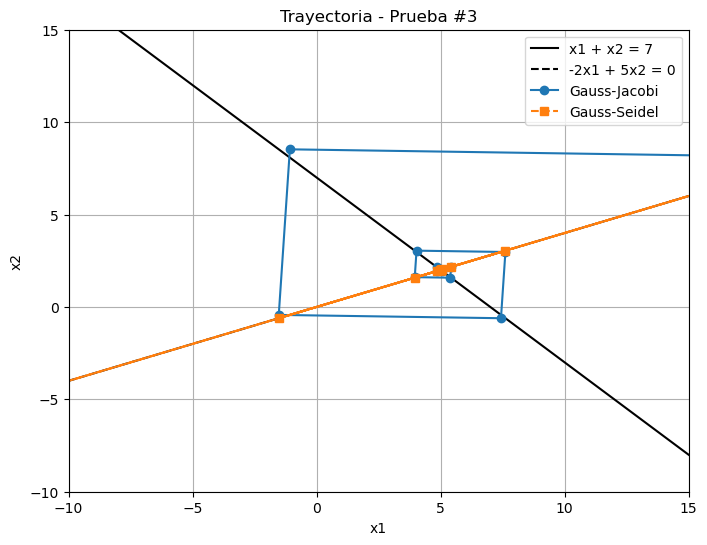

Gauss-Jacobi: Divergió → [5.0002738  2.00010201]
Gauss-Seidel: Convergió → [5.00000112 2.00000045]


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Tus funciones gauss_jacobi y gauss_seidel ya deben estar definidas/importadas

def resolver_y_graficar_con_ecuaciones(x0, nombre, A, b, tol, max_iter):
    print(f"\nPrueba: {nombre} con x0 = {x0.ravel()}")

    # Ejecutar métodos
    sol_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_jacobi = len(tray_jacobi) < max_iter

    sol_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_seidel = len(tray_seidel) < max_iter

    # Convertir trayectorias a arrays (n_iter, 2)
    tray_jacobi = np.concatenate(tray_jacobi, axis=1).T
    tray_seidel = np.concatenate(tray_seidel, axis=1).T

    # Preparar gráfico
    plt.figure(figsize=(8, 6))

    # Graficar ecuaciones:
    x_vals = np.linspace(-10, 15, 300)

    # Primera ecuación: x1 + x2 = 7  => x2 = 7 - x1
    y1 = 7 - x_vals

    # Segunda ecuación: -2x1 + 5x2 = 0 => x2 = (2/5)*x1
    y2 = (2/5) * x_vals

    plt.plot(x_vals, y1, 'k-', label='x1 + x2 = 7')
    plt.plot(x_vals, y2, 'k--', label='-2x1 + 5x2 = 0')

    # Graficar trayectorias
    plt.plot(tray_jacobi[:, 0], tray_jacobi[:, 1], 'o-', label='Gauss-Jacobi')
    plt.plot(tray_seidel[:, 0], tray_seidel[:, 1], 's--', label='Gauss-Seidel')

    # Ajustes gráficos
    plt.title(f"Trayectoria - {nombre}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 15)
    plt.ylim(-10, 15)
    plt.show()

    # Mostrar info de convergencia y soluciones
    print(f"Gauss-Jacobi: {'Convergió' if convergio_jacobi else 'Divergió'} → {sol_jacobi.ravel()}")
    print(f"Gauss-Seidel: {'Convergió' if convergio_seidel else 'Divergió'} → {sol_seidel.ravel()}")


# Parámetros y sistema
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)
tol = 1e-5
max_iter = 30

# Condiciones iniciales ordenadas
x0_list = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]]),
    np.array([[100.0], [-100.0]])
]

# Ejecutar pruebas ordenadas
for i, x0 in enumerate(x0_list, start=1):
    resolver_y_graficar_con_ecuaciones(x0, f"Prueba #{i}", A, b, tol, max_iter)


## ejercicio 2

In [67]:
# Nuevo sistema
A = np.array([[1, 1], [-2, 1]], dtype=float)
b = np.array([[6], [0]], dtype=float)
tol = 1e-5
max_iter = 30



In [68]:
x0_list = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]]),
    np.array([[100.0], [-100.0]])  # Candidata a divergencia
]


In [69]:
def resolver_y_graficar_con_ecuaciones(x0, nombre, A, b, tol, max_iter):
    print(f"\nPrueba: {nombre} con x0 = {x0.ravel()}")

    # Ejecutar métodos
    sol_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_jacobi = len(tray_jacobi) < max_iter

    sol_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    convergio_seidel = len(tray_seidel) < max_iter

    # Convertir trayectorias
    tray_jacobi = np.concatenate(tray_jacobi, axis=1).T
    tray_seidel = np.concatenate(tray_seidel, axis=1).T

    # Preparar gráfico
    plt.figure(figsize=(8, 6))

    # Ecuaciones
    x_vals = np.linspace(-10, 15, 300)
    y1 = 6 - x_vals              # x1 + x2 = 6 → x2 = 6 - x1
    y2 = 2 * x_vals              # -2x1 + x2 = 0 → x2 = 2x1

    plt.plot(x_vals, y1, 'k-', label='x1 + x2 = 6')
    plt.plot(x_vals, y2, 'k--', label='-2x1 + x2 = 0')

    # Trayectorias
    plt.plot(tray_jacobi[:, 0], tray_jacobi[:, 1], 'o-', label='Gauss-Jacobi')
    plt.plot(tray_seidel[:, 0], tray_seidel[:, 1], 's--', label='Gauss-Seidel')

    # Ajustes visuales
    plt.title(f"Trayectoria - {nombre}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 15)
    plt.ylim(-10, 15)
    plt.show()

    # Mostrar resultados
    print(f"Gauss-Jacobi: {'Convergió' if convergio_jacobi else 'Divergió'} → {sol_jacobi.ravel()}")
    print(f"Gauss-Seidel: {'Convergió' if convergio_seidel else 'Divergió'} → {sol_seidel.ravel()}")



Prueba: Prueba #1 con x0 = [0. 0.]
[07-15 17:44:56][INFO] i= 0 x: [[0. 0.]]
[07-15 17:44:56][INFO] i= 1 x: [[6. 0.]]
[07-15 17:44:56][INFO] i= 2 x: [[ 6. 12.]]
[07-15 17:44:56][INFO] i= 3 x: [[-6. 12.]]
[07-15 17:44:56][INFO] i= 4 x: [[ -6. -12.]]
[07-15 17:44:56][INFO] i= 5 x: [[ 18. -12.]]
[07-15 17:44:56][INFO] i= 6 x: [[18. 36.]]
[07-15 17:44:56][INFO] i= 7 x: [[-30.  36.]]
[07-15 17:44:56][INFO] i= 8 x: [[-30. -60.]]
[07-15 17:44:56][INFO] i= 9 x: [[ 66. -60.]]
[07-15 17:44:56][INFO] i= 10 x: [[ 66. 132.]]
[07-15 17:44:56][INFO] i= 11 x: [[-126.  132.]]
[07-15 17:44:56][INFO] i= 12 x: [[-126. -252.]]
[07-15 17:44:56][INFO] i= 13 x: [[ 258. -252.]]
[07-15 17:44:56][INFO] i= 14 x: [[258. 516.]]
[07-15 17:44:56][INFO] i= 15 x: [[-510.  516.]]
[07-15 17:44:56][INFO] i= 16 x: [[ -510. -1020.]]
[07-15 17:44:56][INFO] i= 17 x: [[ 1026. -1020.]]
[07-15 17:44:56][INFO] i= 18 x: [[1026. 2052.]]
[07-15 17:44:56][INFO] i= 19 x: [[-2046.  2052.]]
[07-15 17:44:56][INFO] i= 20 x: [[-2046. -4092

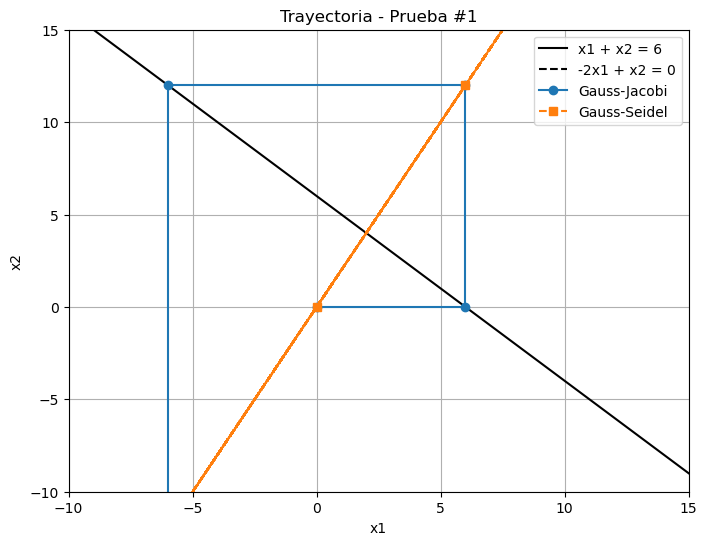

Gauss-Jacobi: Divergió → [ 65538. -65532.]
Gauss-Seidel: Divergió → [1.07374183e+09 2.14748365e+09]

Prueba: Prueba #2 con x0 = [5. 2.]
[07-15 17:44:56][INFO] i= 0 x: [[5. 2.]]
[07-15 17:44:56][INFO] i= 1 x: [[ 4. 10.]]
[07-15 17:44:56][INFO] i= 2 x: [[-4.  8.]]
[07-15 17:44:56][INFO] i= 3 x: [[-2. -8.]]
[07-15 17:44:56][INFO] i= 4 x: [[14. -4.]]
[07-15 17:44:56][INFO] i= 5 x: [[10. 28.]]
[07-15 17:44:56][INFO] i= 6 x: [[-22.  20.]]
[07-15 17:44:56][INFO] i= 7 x: [[-14. -44.]]
[07-15 17:44:56][INFO] i= 8 x: [[ 50. -28.]]
[07-15 17:44:56][INFO] i= 9 x: [[ 34. 100.]]
[07-15 17:44:56][INFO] i= 10 x: [[-94.  68.]]
[07-15 17:44:56][INFO] i= 11 x: [[ -62. -188.]]
[07-15 17:44:56][INFO] i= 12 x: [[ 194. -124.]]
[07-15 17:44:56][INFO] i= 13 x: [[130. 388.]]
[07-15 17:44:56][INFO] i= 14 x: [[-382.  260.]]
[07-15 17:44:56][INFO] i= 15 x: [[-254. -764.]]
[07-15 17:44:56][INFO] i= 16 x: [[ 770. -508.]]
[07-15 17:44:56][INFO] i= 17 x: [[ 514. 1540.]]
[07-15 17:44:56][INFO] i= 18 x: [[-1534.  1028.]

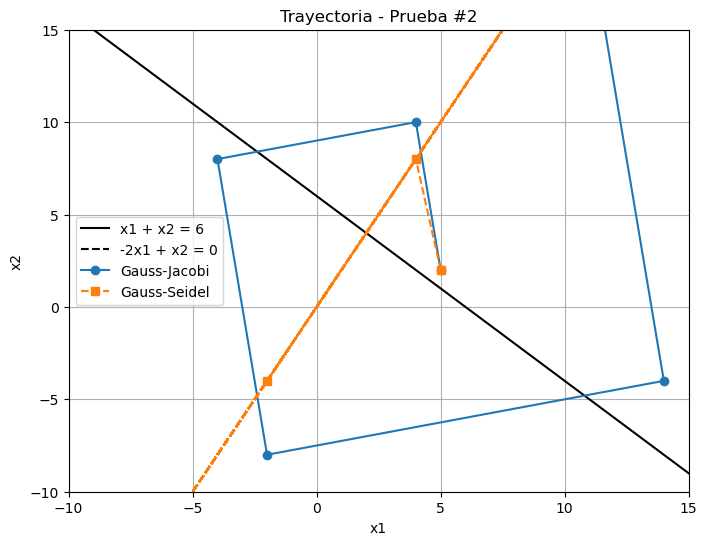

Gauss-Jacobi: Divergió → [32770. 98308.]
Gauss-Seidel: Divergió → [5.36870914e+08 1.07374183e+09]

Prueba: Prueba #3 con x0 = [ 100. -100.]
[07-15 17:44:56][INFO] i= 0 x: [[ 100. -100.]]
[07-15 17:44:57][INFO] i= 1 x: [[106. 200.]]
[07-15 17:44:57][INFO] i= 2 x: [[-194.  212.]]
[07-15 17:44:57][INFO] i= 3 x: [[-206. -388.]]
[07-15 17:44:57][INFO] i= 4 x: [[ 394. -412.]]
[07-15 17:44:57][INFO] i= 5 x: [[418. 788.]]
[07-15 17:44:57][INFO] i= 6 x: [[-782.  836.]]
[07-15 17:44:57][INFO] i= 7 x: [[ -830. -1564.]]
[07-15 17:44:57][INFO] i= 8 x: [[ 1570. -1660.]]
[07-15 17:44:57][INFO] i= 9 x: [[1666. 3140.]]
[07-15 17:44:57][INFO] i= 10 x: [[-3134.  3332.]]
[07-15 17:44:57][INFO] i= 11 x: [[-3326. -6268.]]
[07-15 17:44:57][INFO] i= 12 x: [[ 6274. -6652.]]
[07-15 17:44:57][INFO] i= 13 x: [[ 6658. 12548.]]
[07-15 17:44:57][INFO] i= 14 x: [[-12542.  13316.]]
[07-15 17:44:57][INFO] i= 15 x: [[-13310. -25084.]]
[07-15 17:44:57][INFO] i= 16 x: [[ 25090. -26620.]]
[07-15 17:44:57][INFO] i= 17 x: [[

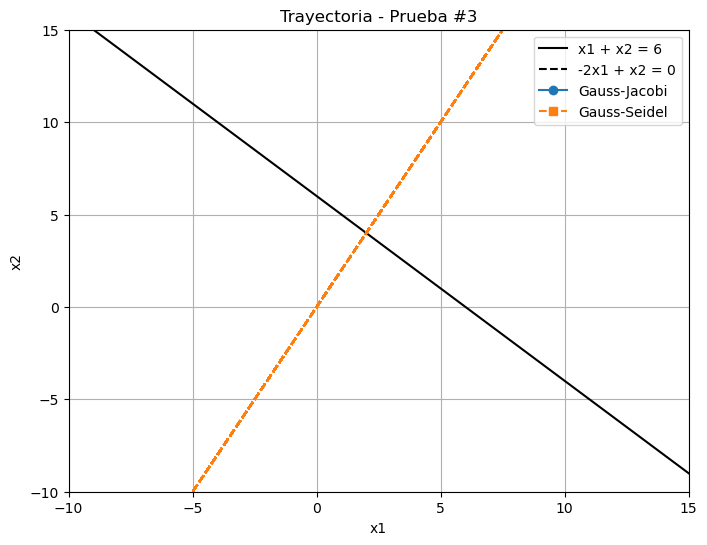

Gauss-Jacobi: Divergió → [1703938. 3211268.]
Gauss-Seidel: Divergió → [2.79172874e+10 5.58345749e+10]


In [ ]:
for i, x0 in enumerate(x0_list, start=1):
    resolver_y_graficar_con_ecuaciones(x0, f"Prueba #{i}", A, b, tol, max_iter)
    #
